# Student Performance Predictive Modeling
In this notebook, I use a dataset on student performance metrics to do some data analysis and predictive modeling. The data contains various factors such as number of absences, GPA, time spent studying weekly, parental support, tutoring, and more. The target variable is 'GradeClass' ranging from 0.0 to 4.0, representing grades A, B, C, D, and F.

Firstly, I did a regression analysis; I created a model for predicting student GPAs and investigated the most influencing features. Then, I made classification models for predicting the 'GradeClass' variable.

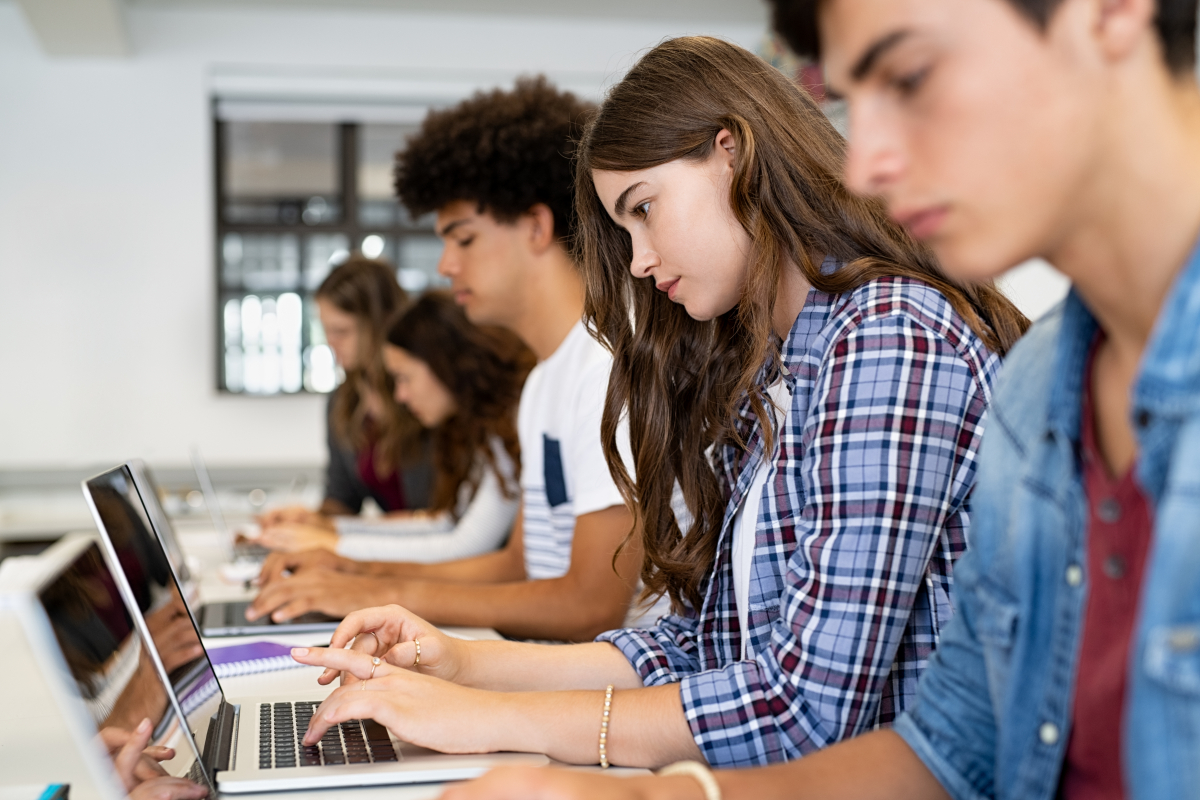

Image: https://ed.stanford.edu/news/national-study-high-school-students-digital-skills-paints-worrying-portrait-stanford

Dataset: https://www.kaggle.com/datasets/rabieelkharoua/students-performance-dataset/data

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, SGDRegressor, LogisticRegression
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.svm import SVR, SVC
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, r2_score, mean_squared_error, mean_absolute_error
from sklearn.feature_selection import RFE

In [2]:
# Load data
data = pd.read_csv('student_data.csv')
data.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [3]:
# Check for missing values
data.isnull().sum()

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

In [4]:
# Check for duplicates
data.duplicated().sum()

0

## Visualization

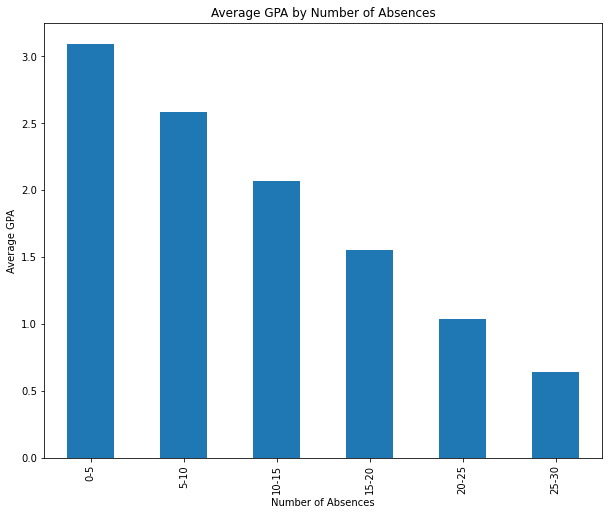

In [5]:
# Bin the data
bins = [0, 5, 10, 15, 20, 25, 30]
labels = ['0-5', '5-10', '10-15', '15-20', '20-25', '25-30']
data['BinnedAbsences'] = pd.cut(data['Absences'], bins = bins, labels = labels, include_lowest = True)
counts = data['BinnedAbsences'].value_counts().sort_index()

# Plot bar graph of absences vs. average GPA
avg = data.groupby('BinnedAbsences')['GPA'].mean()
fig = plt.figure(figsize = (10, 8))
avg.plot(kind = 'bar')
plt.xlabel('Number of Absences')
plt.ylabel('Average GPA')
plt.title('Average GPA by Number of Absences')
plt.show()

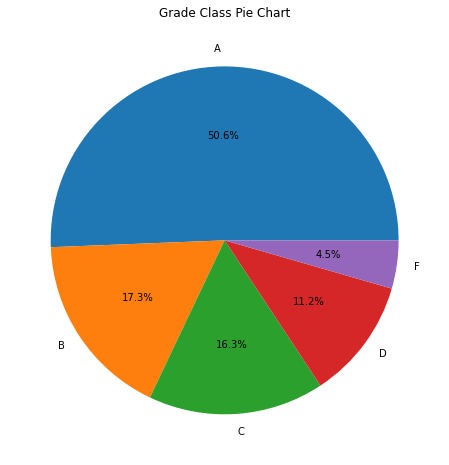

In [6]:
# Plot pie chart of grade class
fig = plt.figure(figsize = (8, 8))
plt.pie(list(data['GradeClass'].value_counts()), labels = ['A', 'B', 'C', 'D', 'F'], autopct = '%1.1f%%')
plt.title('Grade Class Pie Chart')
plt.show()

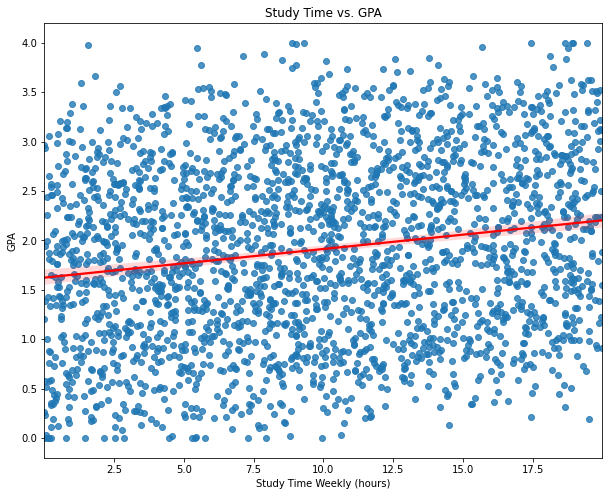

In [7]:
# Scatter plot of time spent studying weekly vs. GPA
plt.figure(figsize = (10, 8))
sns.regplot(x = 'StudyTimeWeekly', y = 'GPA', data = data, line_kws = {'color': 'red'})
plt.title('Study Time vs. GPA')
plt.xlabel('Study Time Weekly (hours)')
plt.ylabel('GPA')
plt.show()

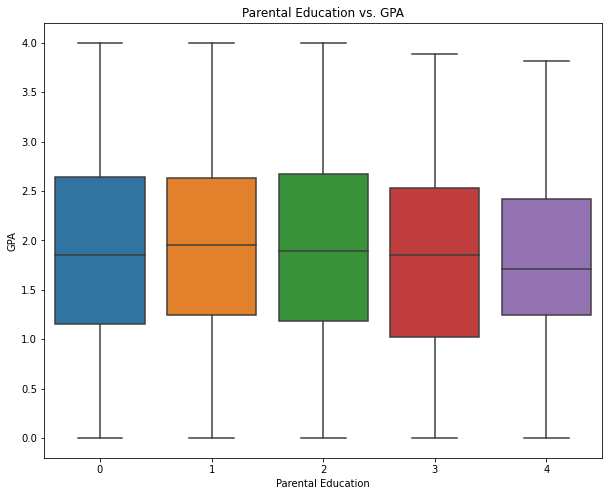

In [8]:
# Box plot of parental education level and GPA
plt.figure(figsize = (10, 8))
sns.boxplot(x = 'ParentalEducation', y = 'GPA', data = data)
plt.title('Parental Education vs. GPA')
plt.xlabel('Parental Education')
plt.ylabel('GPA')
plt.show()

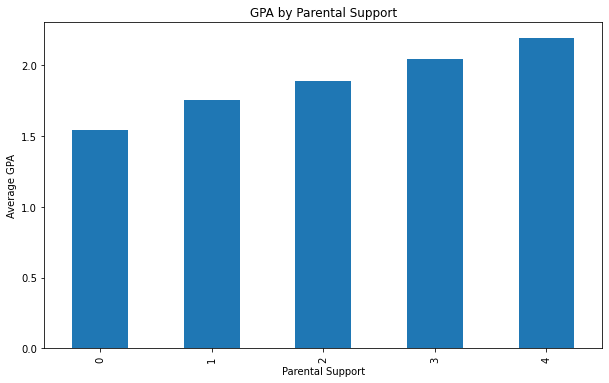

In [9]:
# Bar plot of parental support and GPA
avg = data.groupby(['ParentalSupport'])['GPA'].mean()
plt.figure(figsize=(10, 6))
avg.plot(kind = 'bar')
plt.title('GPA by Parental Support')
plt.xlabel('Parental Support')
plt.ylabel('Average GPA')
plt.show()

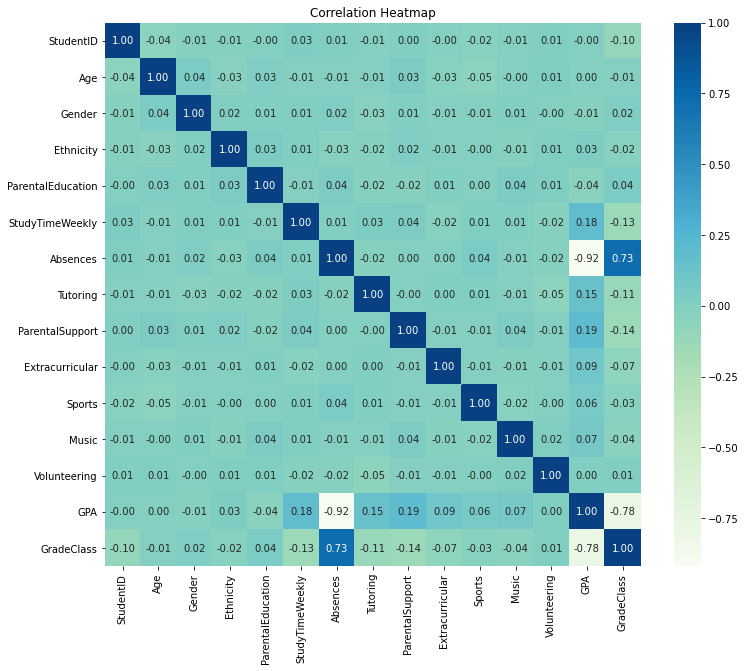

In [10]:
# Correlation matrix
corr = data.corr()

# Heatmap
fig = plt.figure(figsize = (12, 10))
sns.heatmap(corr, annot = True, fmt = '.2f', cmap = 'GnBu')
plt.title('Correlation Heatmap')
plt.show()

## Predictive Modeling

### Regression

In [11]:
# Standardize and split data into training and testing sets
X = data.drop(['GPA', 'BinnedAbsences'], axis = 1)
y = data['GPA']

X_std = StandardScaler().fit_transform(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [12]:
# Fit model and predict
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)

# Evaluation metrics
mse = {}
mae = {}
rmse = {}
r2 = {}
mse['LinReg'] = mean_squared_error(y_test, y_pred)
mae['LinReg'] = mean_absolute_error(y_test, y_pred)
rmse['LinReg'] = np.sqrt(mean_squared_error(y_test, y_pred))
r2['LinReg'] = r2_score(y_test, y_pred)

In [13]:
# Fit model and predict
reg = SGDRegressor().fit(X_train, y_train)
y_pred = reg.predict(X_test)

# Evaluation metrics
mse['SGD'] = mean_squared_error(y_test, y_pred)
mae['SGD'] = mean_absolute_error(y_test, y_pred)
rmse['SGD'] = np.sqrt(mean_squared_error(y_test, y_pred))
r2['SGD'] = r2_score(y_test, y_pred)

In [14]:
# Fit model and predict
reg = SVR().fit(X_train, y_train)
y_pred = reg.predict(X_test)

# Evaluation metrics
mse['SVM'] = mean_squared_error(y_test, y_pred)
mae['SVM'] = mean_absolute_error(y_test, y_pred)
rmse['SVM'] = np.sqrt(mean_squared_error(y_test, y_pred))
r2['SVM'] = r2_score(y_test, y_pred)

In [15]:
# Fit model and predict
reg = DecisionTreeRegressor().fit(X_train, y_train)
y_pred = reg.predict(X_test)

# Evaluation metrics
mse['DT'] = mean_squared_error(y_test, y_pred)
mae['DT'] = mean_absolute_error(y_test, y_pred)
rmse['DT'] = np.sqrt(mean_squared_error(y_test, y_pred))
r2['DT'] = r2_score(y_test, y_pred)

### Classification

In [16]:
# Standardize and split data into training and testing sets
X = data.drop(['GradeClass', 'BinnedAbsences'], axis = 1)
y = data['GradeClass']

X_std = StandardScaler().fit_transform(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [17]:
# Fit logistic regression model
clf = LogisticRegression(max_iter = 10000)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluation metrics
accuracies = {}
accuracy = accuracy_score(y_pred, y_test)
accuracies['LR'] = accuracy
precision = precision_score(y_test, y_pred, average = 'weighted')
recall = recall_score(y_test, y_pred, average = 'weighted')
f1 = f1_score(y_test, y_pred, average = 'weighted')

print('Logistic Regression Results')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Logistic Regression Results
Accuracy: 0.6847599164926931
Precision: 0.6565560643401921
Recall: 0.6847599164926931
F1 Score: 0.6660224186074092


In [18]:
# Fit decision tree model
clf = DecisionTreeClassifier(random_state = 42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluation metrics
accuracy = accuracy_score(y_pred, y_test)
accuracies['DT'] = accuracy
precision = precision_score(y_test, y_pred, average = 'weighted')
recall = recall_score(y_test, y_pred, average = 'weighted')
f1 = f1_score(y_test, y_pred, average = 'weighted')

print('Decision Tree Results')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Decision Tree Results
Accuracy: 0.9290187891440501
Precision: 0.9303182238723422
Recall: 0.9290187891440501
F1 Score: 0.9289337128470324


In [19]:
# Fit random forest model
clf = RandomForestClassifier(random_state = 42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluation metrics
accuracy = accuracy_score(y_pred, y_test)
accuracies['RF'] = accuracy
precision = precision_score(y_test, y_pred, average = 'weighted')
recall = recall_score(y_test, y_pred, average = 'weighted')
f1 = f1_score(y_test, y_pred, average = 'weighted')

print('Random Forest Results')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Random Forest Results
Accuracy: 0.9123173277661796
Precision: 0.9136848561803077
Recall: 0.9123173277661796
F1 Score: 0.9090503529177851


In [20]:
# Fit naive bayes model
clf = GaussianNB()
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluation metrics
accuracy = accuracy_score(y_pred, y_test)
accuracies['NB'] = accuracy
precision = precision_score(y_test, y_pred, average = 'weighted')
recall = recall_score(y_test, y_pred, average = 'weighted')
f1 = f1_score(y_test, y_pred, average = 'weighted')

print('Naive Bayes Results')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Naive Bayes Results
Accuracy: 0.7515657620041754
Precision: 0.728703511948748
Recall: 0.7515657620041754
F1 Score: 0.7386483158925747


In [21]:
# Fit SVM model
clf = SVC()
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluation metrics
accuracy = accuracy_score(y_pred, y_test)
accuracies['SVC'] = accuracy
precision = precision_score(y_test, y_pred, average = 'weighted')
recall = recall_score(y_test, y_pred, average = 'weighted')
f1 = f1_score(y_test, y_pred, average = 'weighted')

print('Support Vector Machine Results')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Support Vector Machine Results
Accuracy: 0.49478079331941544
Precision: 0.24480803343779012
Recall: 0.49478079331941544
F1 Score: 0.32755041345447333


/Users/sydneygruczelak/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Evaluation & Results

### Regression

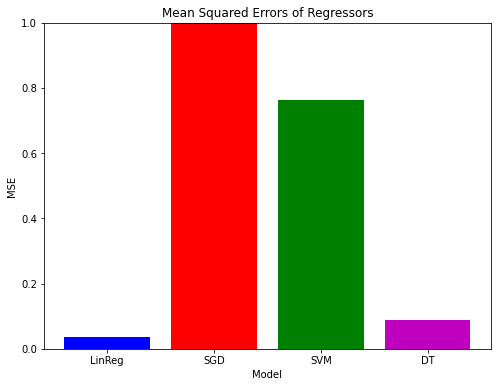

In [22]:
# Create plot for comparing MSE
plt.figure(figsize = (8, 6))
plt.bar(mse.keys(), mse.values(), color = ['b', 'r', 'g', 'm'])
plt.title('Mean Squared Errors of Regressors')
plt.ylim(0, 1)
plt.xlabel('Model')
plt.ylabel('MSE')
plt.show()

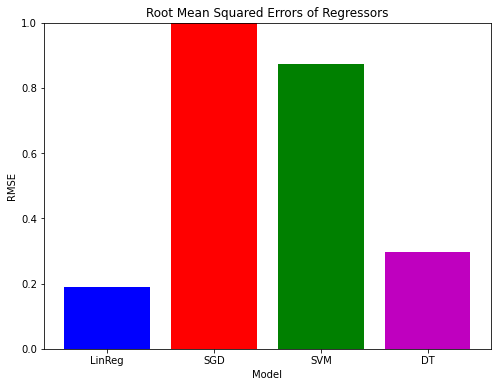

In [23]:
# Create plot for comparing RMSE
plt.figure(figsize = (8, 6))
plt.bar(rmse.keys(), rmse.values(), color = ['b', 'r', 'g', 'm'])
plt.title('Root Mean Squared Errors of Regressors')
plt.ylim(0, 1)
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.show()

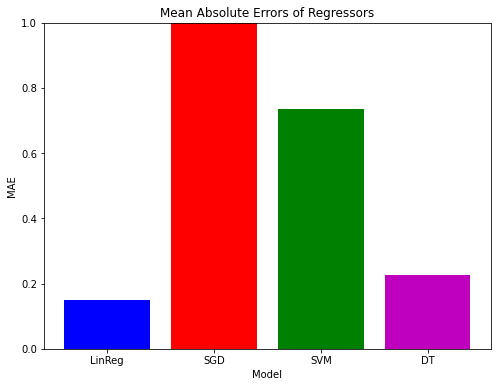

In [24]:
# Create plot for comparing MAE
plt.figure(figsize = (8, 6))
plt.bar(mae.keys(), mae.values(), color = ['b', 'r', 'g', 'm'])
plt.title('Mean Absolute Errors of Regressors')
plt.ylim(0, 1)
plt.xlabel('Model')
plt.ylabel('MAE')
plt.show()

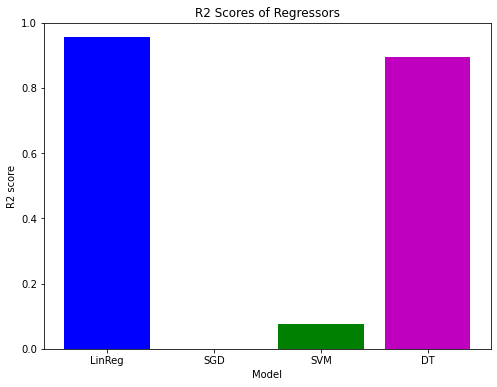

In [25]:
# Create plot for comparing R2 scores
plt.figure(figsize = (8, 6))
plt.bar(r2.keys(), r2.values(), color = ['b', 'r', 'g', 'm'])
plt.title('R2 Scores of Regressors')
plt.ylim(0, 1)
plt.xlabel('Model')
plt.ylabel('R2 score')
plt.show()

### Classification

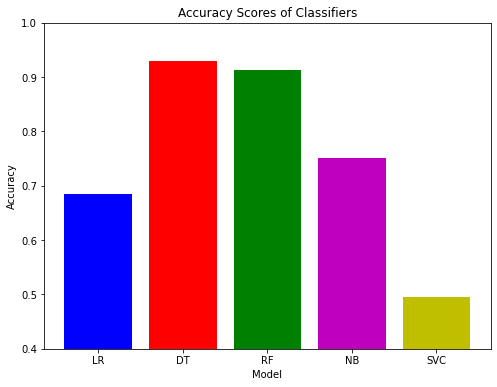

In [26]:
# Create plot for comparing accuracy scores
plt.figure(figsize = (8, 6))
plt.bar(accuracies.keys(), accuracies.values(), color = ['b', 'r', 'g', 'm', 'y'])
plt.ylim(0.4, 1)
plt.title('Accuracy Scores of Classifiers')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()

### Conclusion
Concluding our regression analysis, the best option for predicting GPA is a Linear Regression model. Compared to the other regression models, it produced the smallest MSE, RMSE, and MAE, and the largest R2-Score. 

As for our classification models, the decision tree classifier yields the highest accuracy score. Therefore, we determine this as the best model to use in this case.